# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
diamonds = pd.read_csv(r'/Users/nadimsaad/Desktop/IRONHACK/Module 2/Week 4/Day 20/Project 4/diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

In [19]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   cut            53940 non-null  object 
 3   color          53940 non-null  object 
 4   clarity        53940 non-null  object 
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   price          53940 non-null  int64  
 8   x              53932 non-null  float64
 9   y              53933 non-null  float64
 10  z              53932 non-null  float64
 11  clarity_scale  53940 non-null  int64  
 12  color_scale    53940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 5.4+ MB


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [20]:
diamonds.describe()

,Unnamed: 0.1,carat,depth,table,price,x,y,z,clarity_scale,color_scale
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.732007,5.734159,3.539735,3.051020,2.594197
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.119670,1.113273,0.692051,1.647136,1.701105
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,1.000000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,3.000000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,4.000000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000,7.000000,6.000000


In [4]:
#your comments here
A diamond's price depends on its variability in terms of size, clarity, color, etc.
Our dataset has all these elements cleaned for our analysis 

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
A diamond has a high price (above 5000$) if it has a carat > 1, a depth > 60 mm, a color scale > 4, 
a clarity scale > 4
On the other hand, a diamond has a low price (less than 400$) if it has a carat < 0.3, a depth < 50 mm, 
a color scale < 1, a clarity scale < 2
The average diamond has a price around 4000$, a carat around 0.8, a depth around 61 mm, a color scale 
between 2 and 3, a clarity scale around 3  

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [70]:
diamonds.groupby(['color'])['carat', 'clarity_scale', 'table','price', 'depth'].mean()

<ipython-input-70-08cd094eb24f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diamonds.groupby(['color'])['carat', 'clarity_scale', 'table','price', 'depth'].mean()


,carat,clarity_scale,table,price,depth
color,,,,,
D,0.657795,2.691513,57.404590,3169.954096,61.698125
E,0.657867,2.969889,57.491201,3076.752475,61.662090
F,0.736538,3.133934,57.433536,3724.886397,61.694582
G,0.771190,3.463425,57.288629,3999.135671,61.757111
H,0.911799,2.933646,57.517811,4486.669196,61.836850
I,1.026927,2.964035,57.577278,5091.874954,61.846385
J,1.162137,2.776353,57.812393,5323.818020,61.887215


**What do you see? Pay special attention to the relationship between price and color.**

In [8]:
The more the diamond is expensive the higher the carat is.
There is a corroletation between the price and the color

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

In [35]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Text(0.5, 1.0, 'Distribution of Colors')

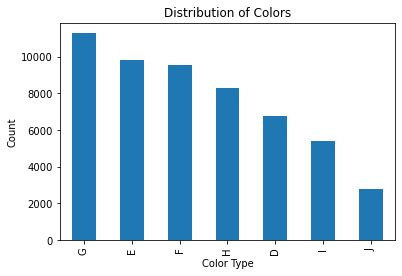

In [37]:
diamonds['color'].value_counts().plot.bar()

# Add labels, title, etc
plt.ylabel('Count')
plt.xlabel('Color Type')
plt.title('Distribution of Colors')

#plt.savefig('figures/distribution of colors.png', bbox_inches='tight')

In [10]:
#your comments here
Most expensive diamonds are the least in count and the cheapest are the average diamonds are the most numerous

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [38]:
diamonds.groupby(['carat'])['price'].agg(['mean'])


,mean
carat,
0.20,365.166667
0.21,380.222222
0.22,391.400000
0.23,486.143345
0.24,505.185039
...,...
4.00,15984.000000
4.01,15223.000000
4.13,17329.000000


In [13]:
without using the corr function we can say there is a link between the carat (weight) and the price. The higher the carat, the higher the price 


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

Text(0, 0.5, 'Count')

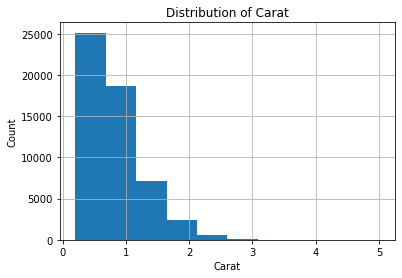

In [65]:
# Pandas plots are based on matplotlib

# Plot the histogram of column carat
diamonds['carat'].hist(bins=10)
 
#diamonds['carat'].value_counts().plot.hist()

# Set titles, labels, etc
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Count') 

# Show the plot

# fig.savefig('test2png.png', dpi=100)
#plt.show()

In [ ]:
# The higher the carat the scarcer the count of diamonds

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [66]:
diamonds.groupby(['table'])['price'].agg(['mean'])

,mean
table,
43.0,4997.0
44.0,474.0
49.0,2290.5
50.0,8995.5
50.1,3353.0
...,...
71.0,1633.0
73.0,2406.5
76.0,2362.0


In [18]:
#your comments here

**Finally, do the same with the `clarity` column.**

In [67]:
diamonds.groupby(['clarity'])['price'].agg(['mean'])

,mean
clarity,
I1,3924.168691
IF,2864.839106
SI1,3996.001148
SI2,5063.028606
VS1,3839.455391
VS2,3924.989395
VVS1,2523.114637
VVS2,3283.737071


In [21]:
# There is almost an equal spread of clarity types of the diamonds except for the SI2 type that is double 
# in qty than some other values

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [23]:
The elements that will affect the price are the carat (weight) and the depth but less with the color and clarity
and no with the table. I imagined more a relation between the color and clarity of a diamond with its price

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


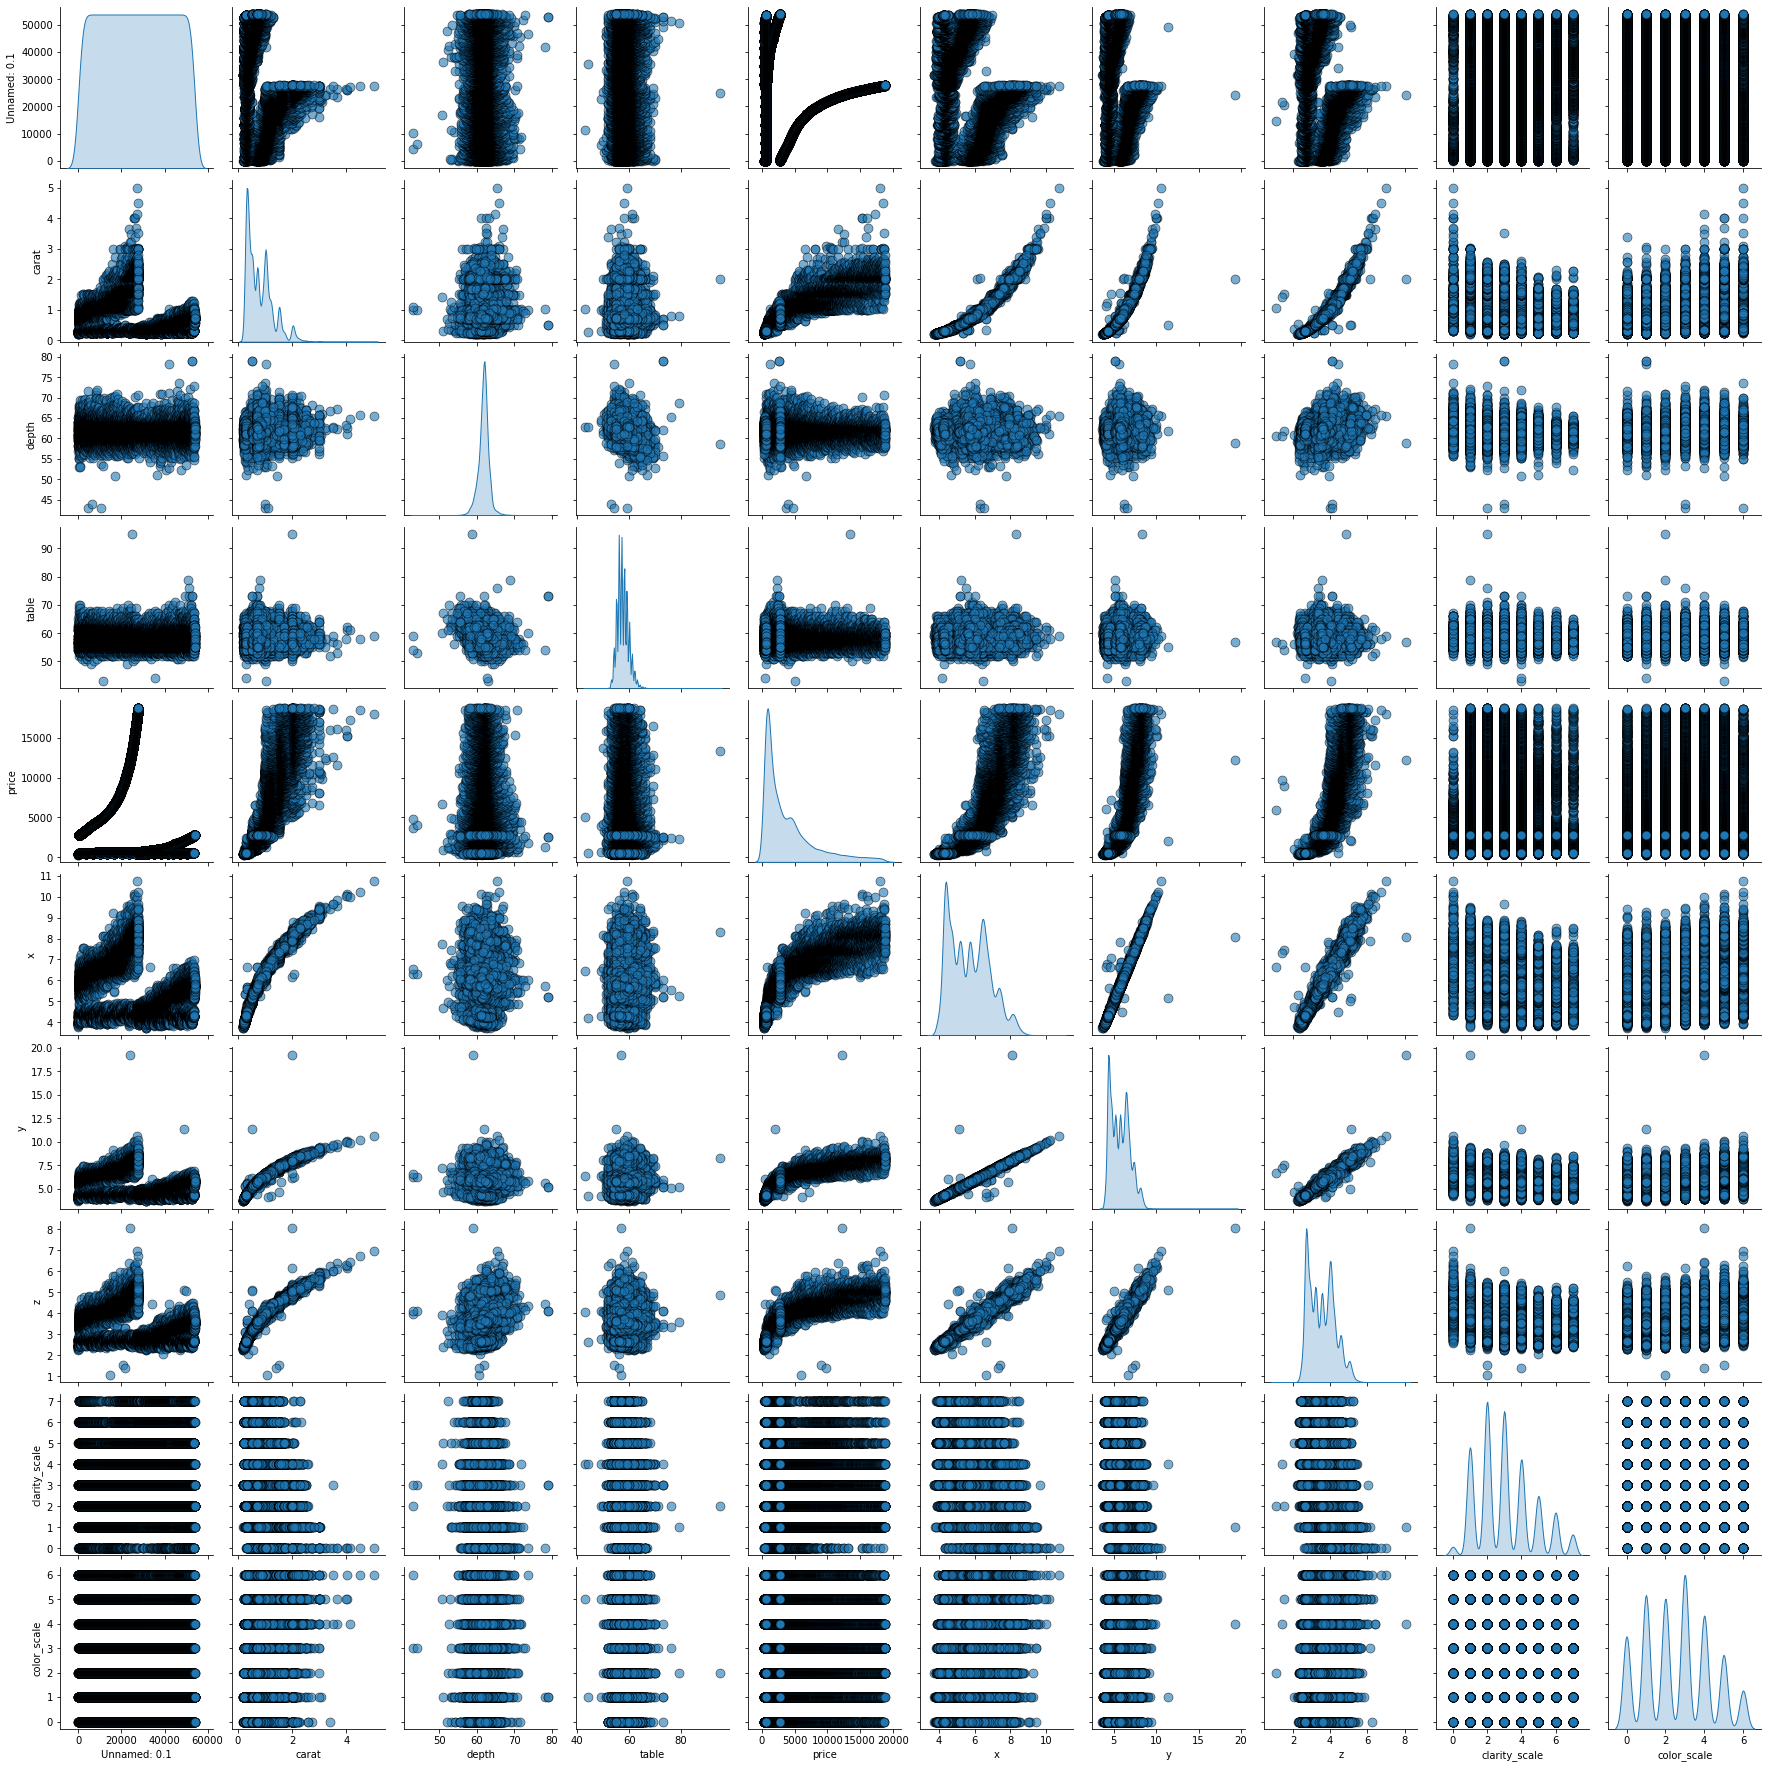

In [71]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
# There is a strong relationship between the price and the carat and the depth (consisting of x, y and z) 
# but very low with the color and the clarity

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

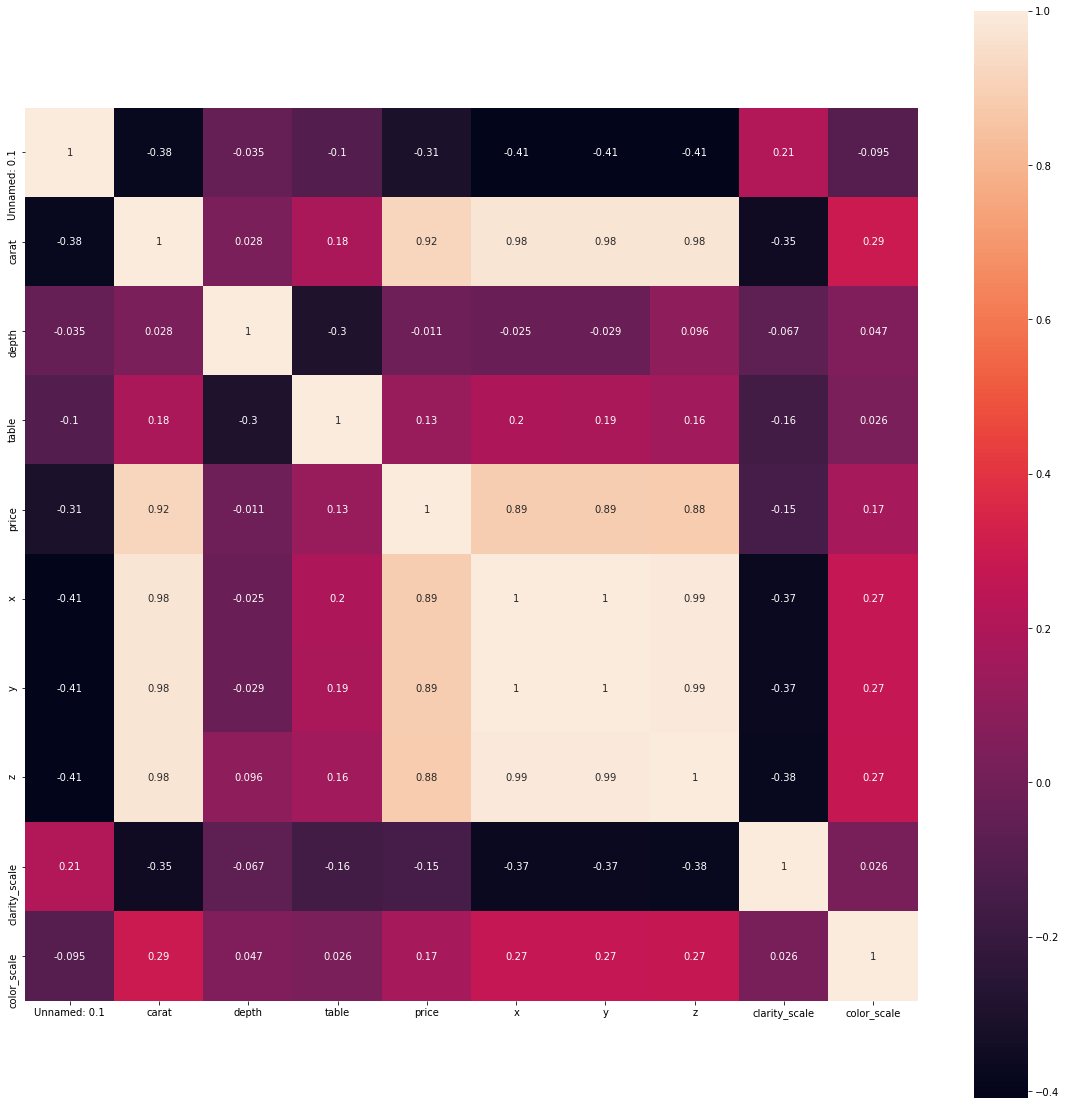

In [72]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [27]:
# Dealing with diamonds is obvious for me so my hypothesis was almost correct
# there is a high correlation between the price and the carat (0.92), followed by the x, y and z (the elements 
# that constitute the depth of a diamond.
# There is a very low correlation between color (0.17) & table (0.13) with the price 
# and a negative very low correlation between the clarity (-0.15) and the price

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

/Users/nadimsaad/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

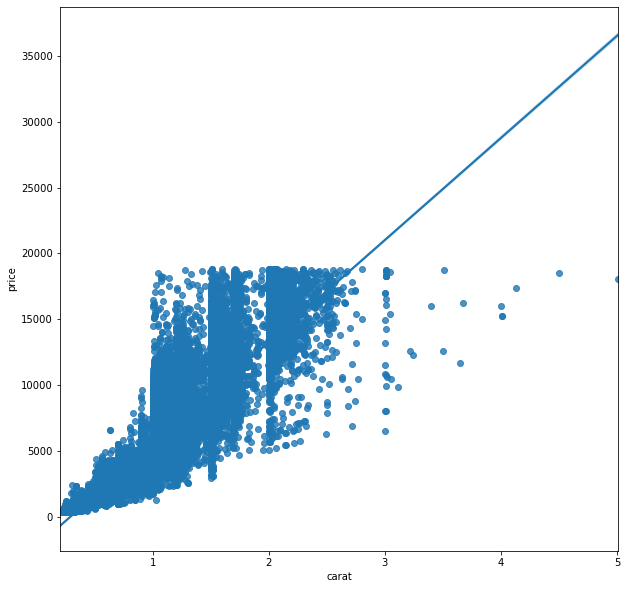

In [73]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True)


In [74]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8493305264354877

**What do you think?**

In [30]:
# The linear regression is well concentrated towards the line showing the strong correlation
however, starting 1 carat, it seems that other elements that the price aloneaffect the price of a diamond 
(i.e. prices are ranging between 2000 and 18000)
On the hand, a 3 carat diamond could range from 5000 to 18000. Here too other elements might affect its price.
But as a general rule, we can say the higher the carat the higher the price.


**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.